In [1]:
%matplotlib inline

In [2]:
import Pdata
import pandas as pa
import numpy as np
import g

In [3]:
df = pa.DataFrame(np.random.randn(20, 6), columns=['A','B','C','D','E','F'])
df = df.cumsum()

## Pdata.Pdata object

In [4]:
df

,A,B,C,D,E,F
0,0.808303,0.469132,0.276475,0.428137,0.222239,0.460288
1,0.504328,1.466552,-0.105337,0.715047,0.363234,-0.904115
2,-0.214248,0.125960,-0.822739,1.141387,-0.677841,-0.465890
3,-1.589414,0.636287,-0.960055,2.283255,-1.401883,-1.527571
4,-4.886247,0.984036,-1.229587,2.482481,-2.761820,-0.877071
5,-5.636090,1.741328,-1.331791,4.195781,-3.147461,-0.840078
6,-3.092350,1.393082,-2.096898,4.670030,-3.442001,-1.633438
7,-1.013779,0.328822,-1.905967,4.296271,-3.295755,-1.000954
8,-1.377539,0.377788,-0.711521,5.494360,-4.495171,-2.608869
9,-2.047245,-0.092712,0.856745,4.617371,-4.417627,-3.746410


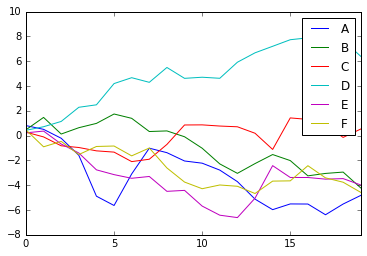

In [5]:
df.plot()

In [6]:
#Pdata.Pdata object could be created from:
#1. pandas Dataframe object
#2. use add_tag,addx,addy,add_xerrl,add_xerrh,add_yerrh,add_yerrl methods.
#3. create from a dict of 1D array
pd = Pdata.Pdata.from_dataframe(df)

In [7]:
pd.taglist

['A', 'B', 'C', 'D', 'E', 'F']

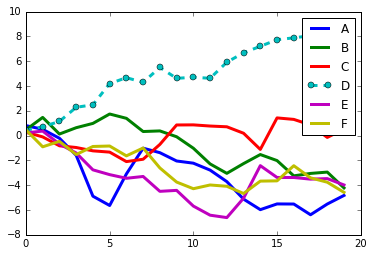

In [8]:
pd.plot()

#you can also change the property after plotting
#pd.plot()
pd.setp_tag('line',marker=[('D','o')],ls=dict(D='--'))
pd.setp_tag(lw=3)
pd.set_legend()

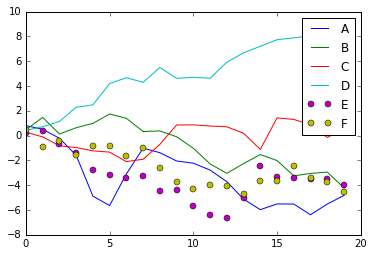

In [9]:
#provide simple tag slicing
pd1 = pd[['A','B','C','D']]
pd2 = pd[['E','F']]

fig,ax = g.Create_1Axes()
pd1.plot(axes=ax)
pd2.plot(axes=ax,marker='o',ls='none')

#another library provide the g.ProxyLenged function
pleg1 = pd1.get_proleg()
pleg2 = pd2.get_proleg()
pleg = g.ProxyLegend.merge_pleg(pleg1,pleg2)
pleg.create_legend(ax)

/home/orchidee03/ychao/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2785: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


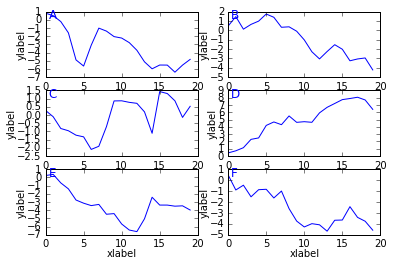

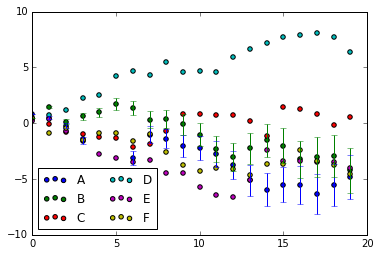

In [10]:
#you can also plot directly to separate axes.
pd.plot_split_axes(ncols=2)
pd.set_ylabel('ylabel')
pd.set_xlabel('xlabel')

#if there is error bar information, it could also be plotted.
#the errorbar will follow the color of scatter plots.
yerrl = np.linspace(0,2,20)
yerrh = np.linspace(0,1,20)
pd.add_attr_by_tag(yerrl=dict(A=yerrl,B=yerrl),yerrh=dict(A=yerrl,B=yerrl))
pd.scatter(legend=False)
pd.errorbar(plt.gca())
plt.gca().set_xlim(0,20)
pd.set_legend(plottype='sca',ncol=2,loc='lower left')

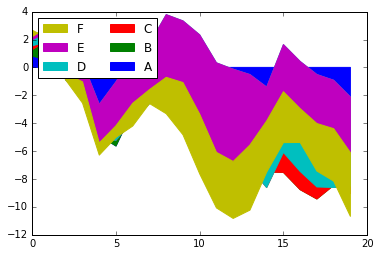

In [11]:
#stackline plot
pd.plot_stackline(legdic=dict(ncol=2,loc='upper left'))

In [12]:
pd.get_data_as_dic('x')

OrderedDict([('A',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19])),
             ('B',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19])),
             ('C',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19])),
             ('D',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19])),
             ('E',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19])),
             ('F',
              array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19]))])

In [13]:
import matplotlib as mat

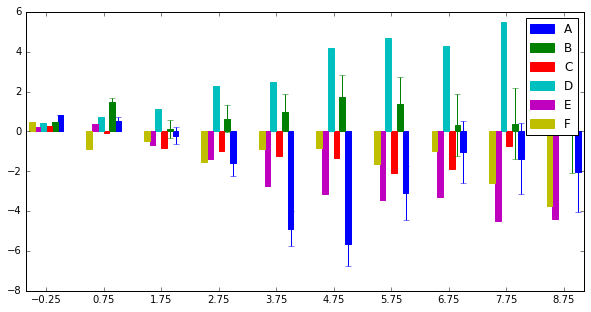

In [14]:
mat.rcParams['figure.figsize'] = (10,5)
pd = Pdata.Pdata.from_dataframe(df.ix[0:9])
pd.add_attr_by_tag(bleftshift=0.1)
pd.add_attr_by_tag(bwidth=0.1)
pd.add_attr_by_tag(color=g.pcolor[0:6])
pd.bar()


yerrl = np.linspace(0,2,10)
yerrh = np.linspace(0,1,10)
pd.add_attr_by_tag(yerrl=dict(A=yerrl,B=yerrl),yerrh=dict(A=yerrl,B=yerrl))
pd.errorbar(plt.gca(),ef='bar')

#pd.set_legend('bar')
pleg = pd.get_proleg()
pleg.create_legend(plt.gca())

## Pdata.NestPdata object: Store nested pdata

In [15]:
#Pdata.NestPdata object could be created from:
#1. a dict of pdata object
#2. a dict of pa.DataFrame
#3. 2D ndarray
npd = Pdata.NestPdata.from_dict_of_dataframe({'original':df,'modified':df+2})

In [16]:
npd.parent_tags

['original', 'modified']

In [17]:
npd.child_tags

['A', 'B', 'C', 'D', 'E', 'F']

In [18]:
npd.child_pdata

OrderedDict([('original', <class 'Pdata.Pdata'>
              tags:
              A,B,C,D,E,F), ('modified', <class 'Pdata.Pdata'>
              tags:
              A,B,C,D,E,F)])

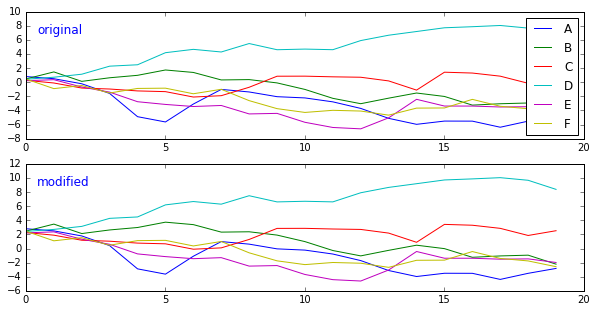

In [19]:
#plot on separate axes
npd.plot_split_parent_tag()

In [20]:
#it allows to permuate the parent and child tags
npd.permuate_tag()

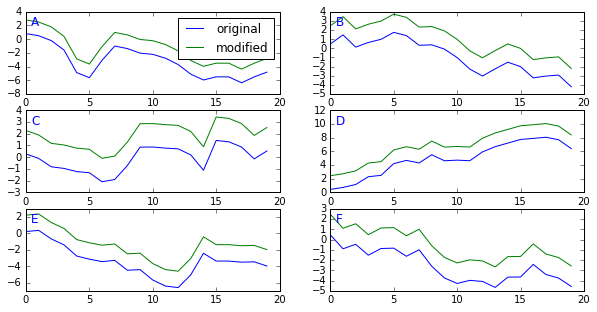

In [21]:
npd.plot_split_parent_tag(ncols=2)

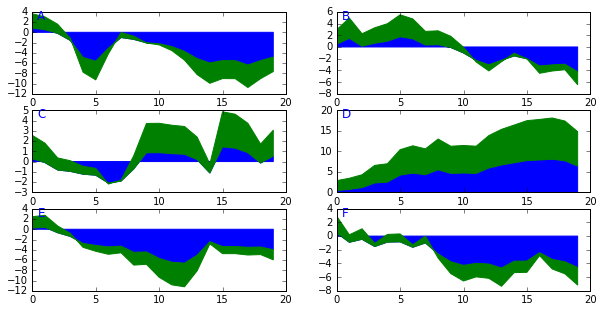

In [22]:
npd.plot_stackline_split_parent_tag(ncols=2,legtag=False)

## Pdata.Mdata object: store labeled matrix data

In [23]:
def func3(x,y):
    return (1- x/2 + x**5 + y**3)*np.exp(-x**2-y**2)


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0001, dx)
y = np.arange(-3.0, 3.0001, dy)
X,Y = np.meshgrid(x, y)

Z = func3(X, Y)

In [24]:
md = Pdata.Mdata.from_dict_of_array({'A':Z,'B':Z+2,'C':Z[::-1],'D':Z[::-1]+2})

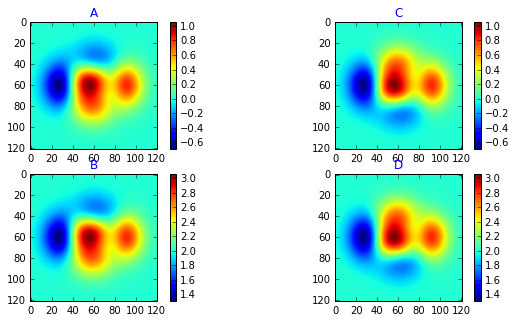

In [25]:
md.imshow_split_axes(cbar=True,ncols=2)